In [2]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy.stats import ks_2samp
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy import optimize


## Test with fitting traces

We use the cells called "...2ndNorm_Smooth.txt" meaning that they are normalized to 1st data point and then fitted with a 5 degree polynomial

0.3989758843069555


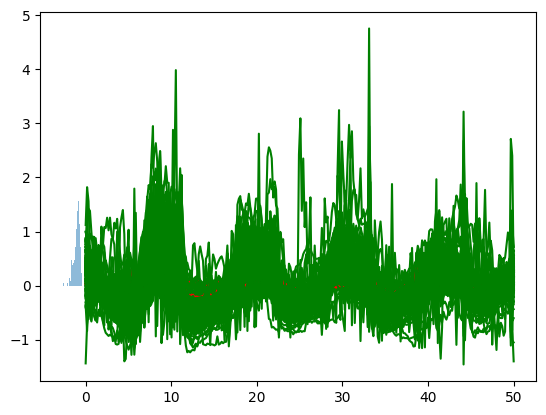

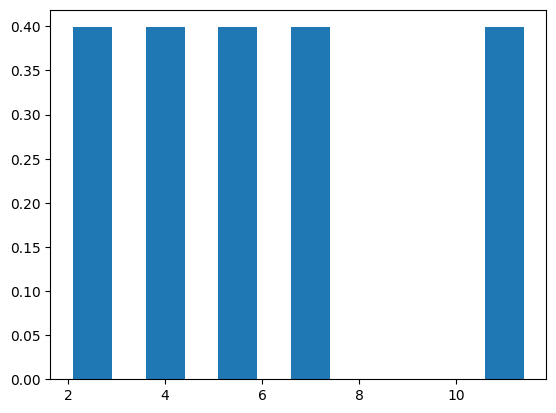

(array([ 2.,  0.,  0.,  0.,  0.,  3.,  4.,  5.,  6.,  3., 11., 13., 19.,
        27., 30., 21., 23., 10.,  7.,  5.]),
 array([-2.20154532, -2.11437576, -2.0272062 , -1.94003664, -1.85286709,
        -1.76569753, -1.67852797, -1.59135841, -1.50418885, -1.41701929,
        -1.32984973, -1.24268017, -1.15551061, -1.06834105, -0.98117149,
        -0.89400193, -0.80683238, -0.71966282, -0.63249326, -0.5453237 ,
        -0.45815414]),
 <BarContainer object of 20 artists>)

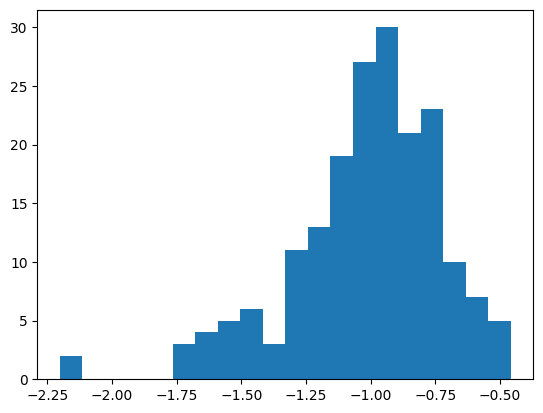

In [42]:
def test_func_osci(x, a, b,c):
    return a*np.sin(b * x + c)


Names = ['2_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','4h_AllCells_2ndNorm_Smooth_WithPoly.txt','5_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','7h_AllCells_2ndNorm_Smooth_WithPoly.txt','11h_AllCells_2ndNorm_Smooth_WithPoly.txt']
Names = ['2_5h_AllCells_2ndNorm.txt','4h_AllCells_2ndNorm.txt','5_5h_AllCells_2ndNorm.txt','7h_AllCells_2ndNorm.txt','11h_AllCells_2ndNorm.txt']

AMS = []
TS = [2.5,4,5.5,7,11]
stds = []
for iname in range(4,5): 
    AM = []
    DD = np.loadtxt(Names[iname])
    T = TS[iname]
    NC,LC = np.shape(DD)
    for icell in range(NC):
        x = DD[icell,:]
        t = np.linspace(0,50,len(x));
        if (np.log(np.std(x))<-2 or len(np.argwhere(np.isnan(x)))>0):
            m = 0
            plt.plot(t,x,'r')
        else:
            m = 1
            plt.plot(t,x,'g')
            
            params_decay, params_covariance_decay = optimize.curve_fit(test_func_osci, t, x,bounds=([0,2*np.pi/20,0], [np.max([np.max(x)*1.1,30]), 2*np.pi/1, 2*np.pi]),
                    p0=[np.max(x), 2*np.pi/T,np.pi])
            AM.append(params_decay[0])
        #plt.plot(t,test_func_osci(t,params_decay[0],params_decay[1],params_decay[2]),color = [.8,0,0.8],lw=5)
    
        stds.append(np.std(x))
    AM = np.array(AM)
    plt.hist(np.log(AM),20,alpha=0.5,density=True)
    print(np.median(AM))
    AMS.append(np.median(AM))
    
    #
    
plt.show()

plt.bar(TS,AMS)
plt.show()
#stds = np.array(stds)
plt.hist(np.log(stds),20)
    

## Finding peaks and valleys

[0.4395545783585367, 0.44157527604390273, 0.13891124868406504, 0.18372608386455272, 0.28214935032520333, 0.25298549473390247, 0.37631600199512205, 0.39432093006585384, 0.3990424445593496, 0.2952854308292684, 0.3040509215203252, 0.25209079702439025, 0.22993046817317062, 0.27233147618943093, 0.24827380417073175, 0.30209798766658535, 0.2098614844422764, 0.2913612919105692, 0.31115404985365863]
[0.47322264964705874, 0.1318230147784314, 0.2682935777329608, 0.37456286100196085, 0.2807086736019608, 0.3142498970784314, 0.348146577117647, 0.2872768778811765, 0.25409766205882356, 0.06274096141764704, 0.2548245564313726, 0.33886668080392157, 0.18554654265490195]
[0.8704134892376234, 1.0314764363682178, 0.8343612334158415, 0.9588638232871288, 0.8797577772079206, 0.7583028153376238, 0.7457333379504949, 0.7838407834386141]
[0.46985141285803295, 0.23478456084262278, 0.2703850780256064, 0.3234446088395738, 0.33852235572131156, 0.29891072383049194, 0.3473230147509178, 0.23185162652655752, 0.26103253697

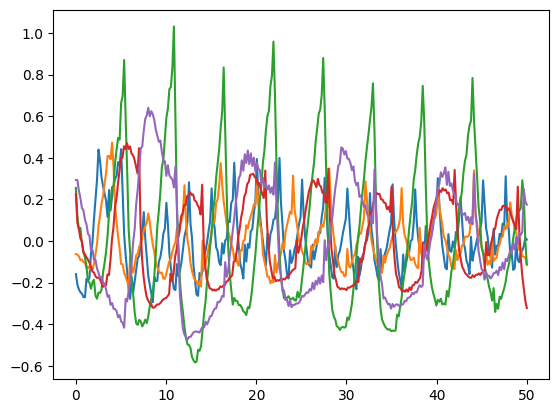

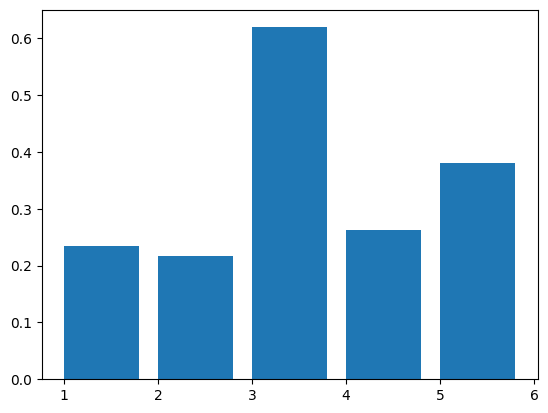

In [43]:
def test_func_osci(x, a, b,c):
    return a*np.sin(b * x + c)
Names = ['2_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','4h_AllCells_2ndNorm_Smooth_WithPoly.txt','5_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','7h_AllCells_2ndNorm_Smooth_WithPoly.txt','11h_AllCells_2ndNorm_Smooth_WithPoly.txt']
Names = ['2_5h_AllCells_2ndNorm.txt','4h_AllCells_2ndNorm.txt','5_5h_AllCells_2ndNorm.txt','7h_AllCells_2ndNorm.txt','11h_AllCells_2ndNorm.txt']

TS = [2.5,4,5.5,7,11]
stds = []
AM = []
n = 6
for iname in range(len(Names)): 
    
    DD = np.loadtxt(Names[iname])
    XX = []
    T = TS[iname]
    NC,LC = np.shape(DD)
    for icell in range(NC):
        x = DD[icell,:]
        t = np.linspace(0,50,len(x));
        if (np.log(np.std(x))<-2 or len(np.argwhere(np.isnan(x)))>0):
            m = 0
        else:
            m = 1
            XX.append(x)
    
    mx = np.mean(XX,axis=0)
    
    peaks, properties = find_peaks(mx, prominence=0.2) # Adjust the prominence value as needed
    peak_heights = mx[peaks]
    
    tops = []
    valleys = []
    acc = 0
    for i in range(n,len(mx)-n):
        ct = 0
        cb = 0
        cn = 0
        for j in range(-n,n+1):
            cn+=1
           
            if (mx[i]>mx[i+j]):
                ct += 1
            if (mx[i]<mx[i+j]):
                cb += 1
       
        if ct == 2*n:
            tops.append(mx[i])
        elif cb == 2*n:
            valleys.append(mx[i])
    print(tops)
    plt.plot(t,mx)
    params_decay, params_covariance_decay = optimize.curve_fit(test_func_osci, t, mx, bounds=([0,2*np.pi/20,0], [np.max([np.max(mx)*1.1,30]), 2*np.pi/1, 2*np.pi]),
                p0=[np.max(mx), 2*np.pi/T,np.pi])
    AM.append(0.5*(np.mean(tops)-np.mean(valleys)))
    
print(AM)
AMS = np.array(AM)
plt.show()

plt.bar(0.4+np.linspace(1,5,5),AMS)
plt.show()


## Find individual peaks

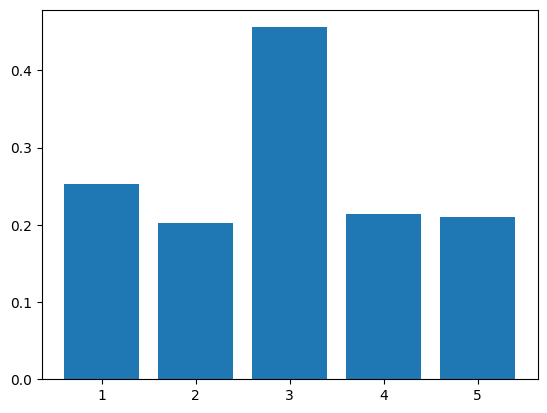

In [44]:
def test_func_osci(x, a, b,c):
    return a*np.sin(b * x + c)
Names = ['2_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','4h_AllCells_2ndNorm_Smooth_WithPoly.txt','5_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','7h_AllCells_2ndNorm_Smooth_WithPoly.txt','11h_AllCells_2ndNorm_Smooth_WithPoly.txt']
Names = ['2_5h_AllCells_2ndNorm.txt','4h_AllCells_2ndNorm.txt','5_5h_AllCells_2ndNorm.txt','7h_AllCells_2ndNorm.txt','11h_AllCells_2ndNorm.txt']

def findPeaks(x,n,tops,valleys):
    for i in range(n,len(x)-n):
        ct = 0; cb = 0
        for j in range(-n,n+1):           
            if (x[i]>x[i+j]):
                ct += 1
            if (x[i]<x[i+j]):
                cb += 1
       
        if ct == 2*n:
            tops.append(x[i])
        elif cb == 2*n:
            valleys.append(x[i])
    return tops,valleys
    
TS = [2.5,4,5.5,7,11]
stds = []
AMS = []
n = 3
for iname in range(len(Names)): 
    
    DD = np.loadtxt(Names[iname])
    XX = []
    T = TS[iname]
    NC,LC = np.shape(DD)
    AM = []
    for icell in range(NC):
        tops = []
        valleys = []
        x = DD[icell,:]
        t = np.linspace(0,50,len(x));
        if (np.log(np.std(x))<-2 or len(np.argwhere(np.isnan(x)))>0):
            m = 0
        else:
            m = 1
            tops,valleys = findPeaks(x,n,tops,valleys)
            AM.append(0.5*(np.mean(tops)-np.mean(valleys)))
    AMS.append(np.mean(AM))
AMS = np.array(AMS)
plt.show()

plt.bar(np.linspace(1,5,5),AMS)
plt.show()


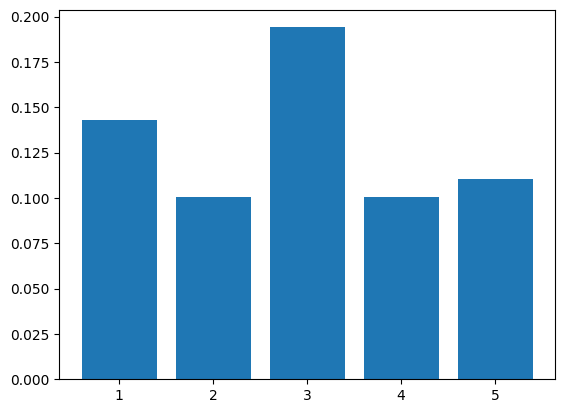

In [46]:
def test_func_osci(x, a, b,c):
    return a*np.sin(b * x + c)
Names = ['2_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','4h_AllCells_2ndNorm_Smooth_WithPoly.txt','5_5h_AllCells_2ndNorm_Smooth_WithPoly.txt','7h_AllCells_2ndNorm_Smooth_WithPoly.txt','11h_AllCells_2ndNorm_Smooth_WithPoly.txt']
Names = ['2_5h_AllCells_2ndNorm.txt','4h_AllCells_2ndNorm.txt','5_5h_AllCells_2ndNorm.txt','7h_AllCells_2ndNorm.txt','11h_AllCells_2ndNorm.txt']

def findPeaks(x,n,tops,valleys):
    for i in range(n,len(x)-n):
        ct = 0; cb = 0
        for j in range(-n,n+1):           
            if (x[i]>x[i+j]):
                ct += 1
            if (x[i]<x[i+j]):
                cb += 1
       
        if ct == 2*n:
            tops.append(x[i])
        elif cb == 2*n:
            valleys.append(x[i])
    return tops,valleys
    
TS = [2.5,4,5.5,7,11]
stds = []
AMS = []
n = 6
for iname in range(len(Names)): 
    
    DD = np.loadtxt(Names[iname])
    XX = []
    T = TS[iname]
    NC,LC = np.shape(DD)
    AM = []
    for icell in range(NC):
        tops = []
        valleys = []
        x = DD[icell,:]
        t = np.linspace(0,50,len(x));
        if (np.log(np.std(x))<-2 or len(np.argwhere(np.isnan(x)))>0):
            m = 0
        else:
            m = 1
            peaks, properties = find_peaks(x, prominence=0.01) # Adjust the prominence value as needed
            peak_heights = x[peaks]
            for ip in peak_heights:
                AM.append(ip)
    AM = np.array(AM)
    AMS.append(np.mean(AM))
    

AMS = np.array(AMS)
plt.bar(np.linspace(1,5,5),AMS)
plt.show()
